In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as linalg
import math
import time

E_J = np.array([1,5,10,50])
E_C = 1
N = 5
d = 11

def H_transmon(N,n_g,E_J): #N is the number of cp passed from one sc to the other so if d=11 then N=(d-1)/2
    D = np.zeros(2*N+1) #this will be the diagonal
    off_D = -(E_J/2)*np.ones(2*N)
    for i in range(2*N+1):
        D[i] = 4*E_C*(-N+i-n_g)**2
    H = np.zeros((2*N+1,2*N+1))
    H = H + np.diag(D) + np.diag(off_D, k=1) + np.diag(off_D, k=-1)
    return H

H_t = H_transmon(5,0,E_J[3])
[energy,vectors] = np.linalg.eigh(H_t)
A = np.sum(np.abs(H_t - np.conj(H_t.T)))
print(A)

0.0


## I want to show the energy of the lowest 5 states as a function of n_g so I'll need to create an array of n_gs in [-1,1] and calculate the energy for each one

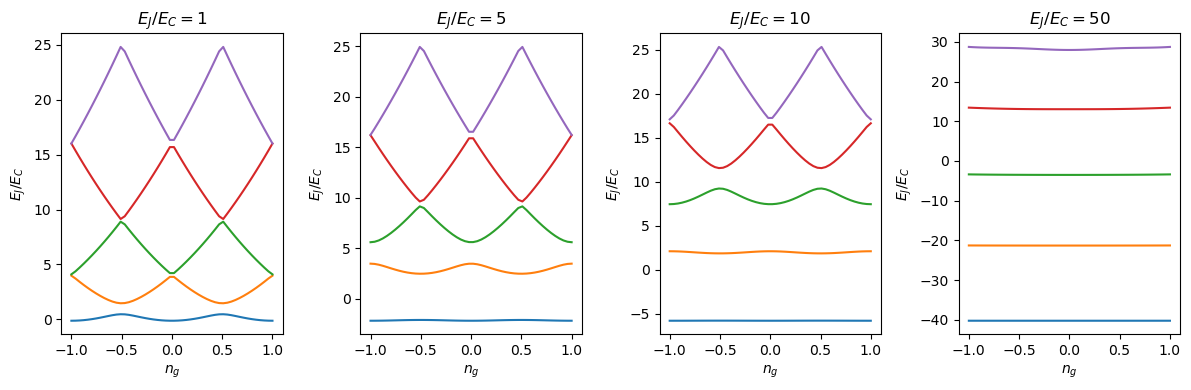

In [31]:
# this is the data for E_J = 1 and E_C = 1
steps = 50
n_g = np.linspace(-1,1,steps)
energies1 = np.zeros((steps,5))
num_of_eigen = 5
for i in np.arange(len(n_g)):
    H = H_transmon(N,n_g[i],E_J[0])
    H = sp.csr_matrix(H)
    [energy,vectors] = linalg.eigsh(H, k = num_of_eigen, which='SM')
    energies1[i] = energy[:5]

# this is the data for E_J = 5 and E_C = 1
energies2 = np.zeros((steps,5))
for i in np.arange(len(n_g)):
    H = H_transmon(N,n_g[i],E_J[1])
    H = sp.csr_matrix(H)
    [energy,vectors] = linalg.eigsh(H, k = num_of_eigen, which='SM')
    energies2[i] = energy[:5]

# this is the data for E_J = 10 and E_C = 1
energies3 = np.zeros((steps,5))
for i in np.arange(len(n_g)):
    H = H_transmon(N,n_g[i],E_J[2])
    H = sp.csr_matrix(H)
    [energy,vectors] = linalg.eigsh(H, k = num_of_eigen, which='SM')
    energies3[i] = energy[:5]

# this is the data for E_J = 50 and E_C = 1
energies4 = np.zeros((steps,5))

for i in np.arange(len(n_g)):
    H = H_transmon(N,n_g[i],E_J[3])
    H = sp.csr_matrix(H)
    [energy,vectors] = linalg.eigsh(H, k = num_of_eigen, which='SM')
    energies4[i] = energy[:5]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

axes[0].set_xlabel(r'$n_{g}$')
axes[0].set_ylabel(r'$E_{J}/E_{C}$')
axes[0].set_title(r'$E_{J}/E_{C}=1$')
axes[0].plot(n_g,energies1[:,0])
axes[0].plot(n_g,energies1[:,1])
axes[0].plot(n_g,energies1[:,2])
axes[0].plot(n_g,energies1[:,3])
axes[0].plot(n_g,energies1[:,4])

axes[1].set_xlabel(r'$n_{g}$')
axes[1].set_ylabel(r'$E_{J}/E_{C}$')
axes[1].set_title(r'$E_{J}/E_{C}=5$')
axes[1].plot(n_g,energies2[:,0])
axes[1].plot(n_g,energies2[:,1])
axes[1].plot(n_g,energies2[:,2])
axes[1].plot(n_g,energies2[:,3])
axes[1].plot(n_g,energies2[:,4])

axes[2].set_xlabel(r'$n_{g}$')
axes[2].set_ylabel(r'$E_{J}/E_{C}$')
axes[2].set_title(r'$E_{J}/E_{C}=10$')
axes[2].plot(n_g,energies3[:,0])
axes[2].plot(n_g,energies3[:,1])
axes[2].plot(n_g,energies3[:,2])
axes[2].plot(n_g,energies3[:,3])
axes[2].plot(n_g,energies3[:,4])

axes[3].set_xlabel(r'$n_{g}$')
axes[3].set_ylabel(r'$E_{J}/E_{C}$')
axes[3].set_title(r'$E_{J}/E_{C}=50$')
axes[3].plot(n_g,energies4[:,0])
axes[3].plot(n_g,energies4[:,1])
axes[3].plot(n_g,energies4[:,2])
axes[3].plot(n_g,energies4[:,3])
axes[3].plot(n_g,energies4[:,4])
plt.tight_layout()
# Save the figure as an image (e.g., PNG)
filename = f'graph_of_diff_limits_for_transmon_only.png'
plt.savefig(filename)
plt.show()


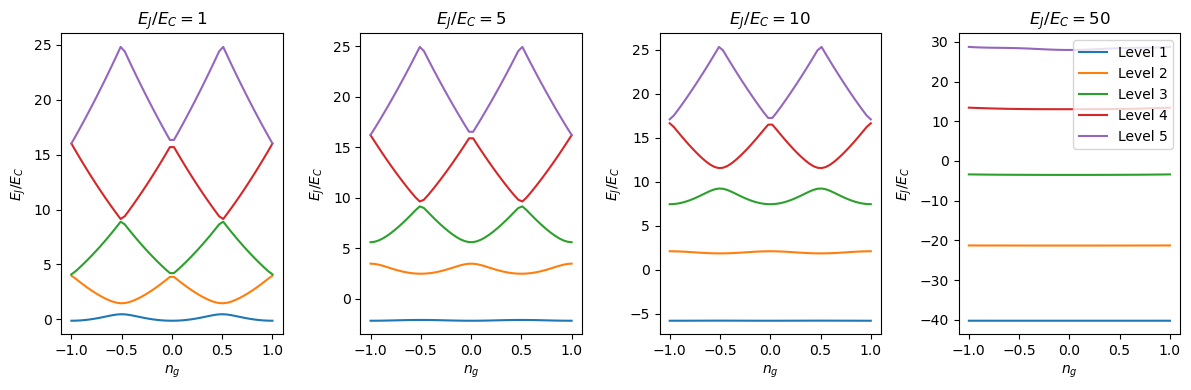

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
from scipy.sparse import linalg

# Define parameters
steps = 50
n_g = np.linspace(-1, 1, steps)
num_of_eigen = 5
E_J_values = [1, 5, 10, 50]  # Values of E_J
legend_labels = []  # Collect legend labels

# Create a loop to generate subplots for different E_J values
for idx, E_J in enumerate(E_J_values):
    energies = np.zeros((steps, 5))

    for i in np.arange(len(n_g)):
        H = H_transmon(N, n_g[i], E_J)
        H = sp.csr_matrix(H)
        [energy, vectors] = linalg.eigsh(H, k=num_of_eigen, which='SM')
        energies[i] = energy[:5]

    # Create subplots
    plt.subplot(1, len(E_J_values), idx + 1)
    plt.xlabel(r'$n_{g}$')
    plt.ylabel(r'$E_{J}/E_{C}$')
    plt.title(f'$E_J/E_C={E_J}$')

    # Plot the energy levels and collect legend labels
    if idx == 0:
        for level in range(5):
            line, = plt.plot(n_g, energies[:, level], label=f'Level {level + 1}')
            legend_labels.append(line)
    else:
        for level in range(5):
            line, = plt.plot(n_g, energies[:, level])

# Set the legend position for the entire figure
plt.legend(handles=legend_labels, loc='upper right')

# Adjust the figure size and layout
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.tight_layout()

# Save the figure as an image (e.g., PNG)
filename = 'graph_of_diff_limits_for_transmon_only.png'
plt.savefig(filename)

plt.show()

## Now I want to see the Harmonic os functions in comperisson to the transmon functions
- note that the vectors that come from np and scipy are normalized
- note that after checking the results i got weird things for the off functions (very small and didn't look like harm os) but when i looked at the value of the function almost all of it was imaginary so when i plotted i added np.imag

[-40.25665949 -21.3130015   -3.50880969  13.0453763   27.97403643
  42.22680259  49.36544607  71.21585411  71.59967121 114.8249685
 114.82631547]
[[-4.12214178e-03 -1.52756738e-02 -3.83614467e-02  7.50631216e-02
  -1.17930568e-01  1.72796870e-01 -1.57039128e-01  3.26174023e-01
  -3.19555608e-01  5.98234009e-01  5.98186187e-01]
 [-2.31263134e-02 -7.41255137e-02 -1.58829907e-01  2.61083420e-01
  -3.39762512e-01  3.99321108e-01 -3.18064248e-01  3.75545627e-01
  -3.63019373e-01 -3.54752014e-01 -3.54755885e-01]
 [-9.23207457e-02 -2.37679129e-01 -3.90535273e-01  4.57073174e-01
  -3.71680308e-01  1.74983022e-01 -2.91500077e-02 -4.34569321e-01
   4.29908723e-01  1.22976387e-01  1.23051194e-01]
 [-2.58476553e-01 -4.70758657e-01 -4.58353444e-01  1.58594289e-01
   2.20438808e-01 -4.42904497e-01  3.33648363e-01  2.36603566e-01
  -2.49164994e-01 -3.29923807e-02 -3.32310038e-02]
 [-4.89320352e-01 -4.64937610e-01  3.28580689e-02 -4.38329717e-01
   2.66098615e-01  2.89655731e-01 -4.16143050e-01 -8.800

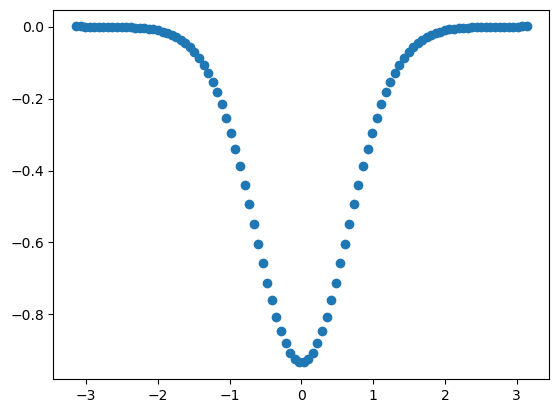

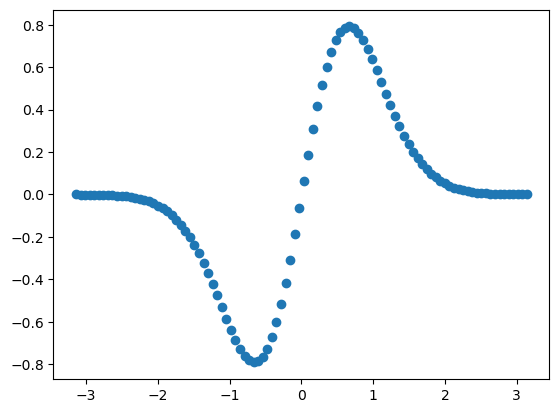

C:\Users\User\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


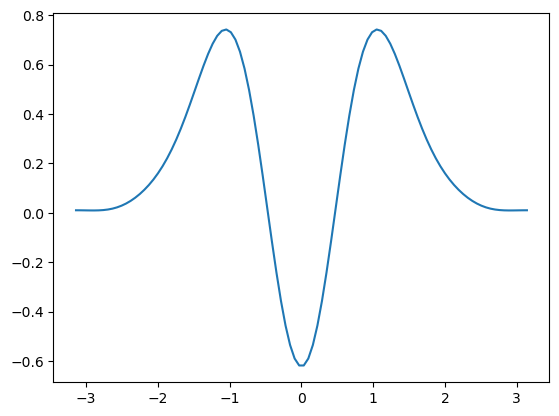

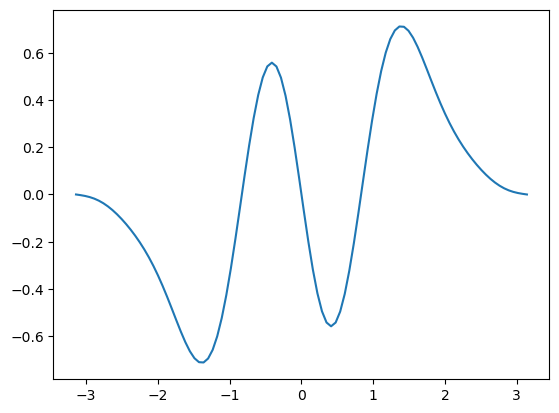

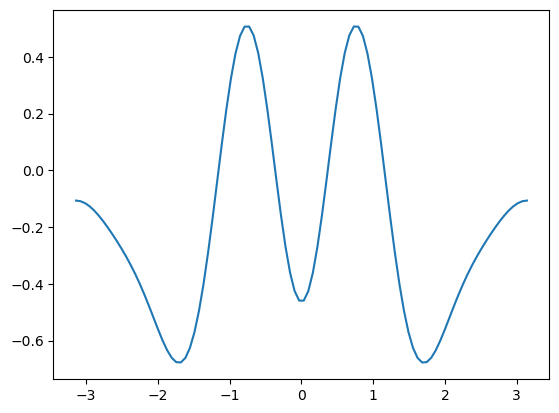

In [5]:

n_g = 0
steps = 100
#vectors4 = np.zeros((2*N+1,2*N+1))
H_0 = H_transmon(N,n_g,E_J[3])
[energy,vectors4] = np.linalg.eigh(H_0)
phi = np.linspace(-np.pi,np.pi,steps)
func1 = np.zeros(steps, dtype=complex) #the values of the 1st function of the transmon for each phi
func_mat = np.zeros((2*N+1,steps), dtype=complex) # a matrix of the eigenfunctions each row contains a function, so if 2*N+1 = 11 and steps=50 in the first row i have the first func and 50 values of it for phi from -pi to pi


#check if vectors are normalized
# def is_normalized(vector):
#     norm = np.linalg.norm(vector)
#     return np.isclose(norm, 1.0)
#
# vector0 = vectors4[:,0]
# vector1 = vectors4[:,1]
#
# print("Is vector0 normalized?", is_normalized(vector0))
# print("Is vector1 normalized?", is_normalized(vector1))



for f in range(2*N+1): # f for function row
    for i in range(steps): # I want a spesific value of phi
        for n in np.arange(0,2*N+1,1): # I wanna go over the different n and take the n'th coordinate of the 1st eigenvector. for example N=5 so i want -5 up to 5 including 5
            func_mat[f,i] += (1/np.sqrt(2*np.pi))*vectors4[n,f]*np.exp(1j*(n-N)*phi[i]) #the n-N is so that the exponent will go feom -N to N
plt.scatter(phi,np.real(func_mat[0,:]))
plt.show()
plt.scatter(phi,np.imag(func_mat[1,:]))
plt.show()
plt.plot(phi,func_mat[2,:])
plt.show()
plt.plot(phi,np.imag(func_mat[3,:]))
plt.show()
plt.plot(phi,func_mat[4,:])
plt.show()


## Now I want to try and solve bigger Hamiltonian with jordan wigner transformation
So this reffers to geometry numbered1 in my notes with Eytan , need to verify the phases of the flux for this one

In [6]:
# Constants
gamma_L = 1
gamma_R = 1
t = 1
E_C = 1
E_J = 50
n_g = 0
N = 6
n_0 = 5
flux_0 = 2*np.pi # the real value is 2.067833*10**(-15)
flux = np.linspace(-flux_0,flux_0,10)
num_of_eigen = 4
steps = 20

# Defining the single spin operators s_x, s_y, s_z:
s_x = 0.5*np.array([[0,1],[1,0]], dtype=complex)
s_y = 0.5*np.array([[0,-1j],[1j,0]], dtype=complex)
s_z = 0.5*np.array([[1,0],[0,-1]], dtype=complex)

s_plus = s_x + 1j*s_y
s_minus = s_x - 1j*s_y

# Defining the creation and annihilation operators for the SCs
exp_phi_plus = np.diag(np.ones(2*n_0, dtype=complex), k=-1) # Creation
exp_phi_minus = np.diag(np.ones(2*n_0, dtype=complex), k=1)# Annihilation

# Defining the N spins operators
def s(matrix, spin_index, N): # matrix is the matrix I want to do kron prod for. options are: s_z, s_plus, s_minus # spin_index is the spin index inside the chain, so if it's 1 it'll be the 1st spin if 2 the 2nd spin ect.
    M = sp.kron(sp.identity(2**(spin_index-1), dtype=complex),sp.kron(matrix, sp.identity(2**(N-spin_index), dtype=complex))) # the first identity matrix is of size 2^i the last identity matrix is of size N-i
    return M

def k(spin_index, N): # calculates k(i) for the jordan-wigner trans
    matrix = sp.identity(2**N, dtype=complex)
    for i in range(1, spin_index): # this reaches i-1, and I used the last equality for k(i)
        matrix = matrix.dot(-2*s(s_z, i))
    return matrix

def H_L(E_C, n_0, n_g): # the hamiltonian for the left SC
    H_L = np.zeros((2*n_0+1, 2*n_0+1), dtype=complex)
    for i in range(2*n_0+1):
        H_L[i,i] = 2*E_C*(-n_0+i-n_g)**2
    return H_L

def H_R(E_C, n_0, n_g): # the hamiltonian for the right SC, right now it's the same so i won't use it but in case it's useful
    H_R = np.zeros((2*n_0+1, 2*n_0+1), dtype=complex)
    for i in range(2*n_0+1):
        H_R[i,i] = 2*E_C*(-n_0+i-n_g)**2
    return H_R

def H_C(N, t): # the hamiltonian of the chain, N is the number of spins in the system (when we count the up and down spins). t is the tunneling constant
    H_C = np.zeros((2**N,2**N), dtype=complex)
    for i in range(0, N-2, 1):
        H_C += np.kron(np.identity(2**(i-1+1), dtype=complex),np.kron(s_plus,np.kron(-s_z, np.kron(s_minus,np.identity(2**(N-(i+2+1)), dtype=complex))))) +\
               np.kron(np.identity(2**(i-1+1), dtype=complex),np.kron(s_minus,np.kron(-s_z, np.kron(s_plus,np.identity(2**(N-(i+2+1)), dtype=complex))))) # I am adding +1 in all the dimensions because the range starts from 0 and the spin index start from 1
    B = np.sum(np.abs(H_C-np.conj(H_C.T)))
    print(B)
    return -t*H_C

def H(E_C, n_0, n_g, N, t):
    H = np.kron(H_L(E_C,n_0,n_g),np.kron(np.identity(2**N, dtype=complex),np.identity((2*n_0+1), dtype=complex))) + \
        np.kron(np.identity((2*n_0+1), dtype=complex),np.kron(H_C(N,t),np.identity((2*n_0+1), dtype=complex))) + \
        np.kron(np.identity(2*n_0+1, dtype=complex),np.kron(np.identity(2**N, dtype=complex), H_R(E_C,n_0,n_g)))
    return H

def H_int(E_J, N, n_0, gamma_L, gamma_R, flux1):
    exp_plus = np.exp(1j*flux1/2) # should be next to phi_L and -phi_R
    exp_minus = np.conj(exp_plus) # should be next to -phi_L and phi_R
    H_int = -E_J * (np.cos(np.pi * flux1 / flux_0)) * (np.kron(exp_plus*exp_phi_plus, np.kron(np.identity(2 ** N, dtype=complex), exp_plus*exp_phi_minus)) +
                                                       np.kron(exp_minus*exp_phi_minus, np.kron(np.identity(2 ** N, dtype=complex), exp_minus*exp_phi_plus))) + \
            gamma_L * (np.kron(exp_plus*exp_phi_plus, np.kron(s_minus,np.kron(s_minus, np.kron(np.identity(2**(N-2), dtype=complex), np.identity(2*n_0+1, dtype=complex))))) +
                       np.kron(exp_minus*exp_phi_minus, np.kron(s_plus,np.kron(s_plus, np.kron(np.identity(2**(N-2), dtype=complex), np.identity(2*n_0+1, dtype=complex)))))) + \
            gamma_R * (np.kron(np.identity(2*n_0+1, dtype=complex), np.kron(np.identity(2**(N-2), dtype=complex), np.kron(s_minus, np.kron(s_minus,exp_minus*exp_phi_plus)))) +
                       np.kron(np.identity(2*n_0+1, dtype=complex), np.kron(np.identity(2**(N-2), dtype=complex), np.kron(s_plus, np.kron(s_plus, exp_plus*exp_phi_minus)))))
    return H_int

eigenvalues = np.zeros((steps,num_of_eigen))

tic = time.time()

H_1 = H(E_C, n_0, n_g, N, t)+H_int(E_J, N, n_0,gamma_L, gamma_R, 0)
H_sparse = sp.csr_matrix(H_1)
A = np.sum(np.abs(H_1 - np.conj(H_1.T)))
print(A)
eigenvalues1, eigenvectors1 = linalg.eigsh(H_sparse, k = num_of_eigen, which='SM')

print(eigenvalues1)

is_hermitian = np.all(H_sparse.toarray() == np.conj(H_sparse.toarray().T))

if is_hermitian:
    print("The matrix is Hermitian.")
else:
    print("The matrix is not Hermitian.")

for i in range(steps):
    H_sparse = sp.csr_matrix(H(E_C, n_0, n_g, N, t)+H_int(E_J, N, n_0,gamma_L, gamma_R, flux[i]))
    eigenvalues1, eigenvectors1 = linalg.eigsh(H_sparse, k = num_of_eigen, which='SM')
    eigenvalues[i,:] = eigenvalues1


plt.plot(flux,eigenvalues[:,0], 'r')
plt.plot(flux,eigenvalues[:,1], 'm')
plt.plot(flux,eigenvalues[:,2], 'y')
plt.plot(flux,eigenvalues[:,3], 'g')
plt.show()
toc = time.time()
print(f"time {toc - tic}s")

0.0


KeyboardInterrupt: 

## changing tactic
Talked with eytan and we weren't sure about the phases of the flux in the previous hamiltonian so we first wanna try a different geometry specified in page 29 in my notes from our meetings (Geometry numbered as 2)

## Symmetric Transmon + chain

In [47]:
# Constants
gamma_L = 1
gamma_R = 1
t = 0.1
E_C = 1
E_J1 = 50
E_J2 = E_J1
n_g = 0
N = 6
n_0 = 5
steps = 100
flux_0 = 2*np.pi # the real value is 2.067833*10**(-15)
flux = np.linspace(-flux_0,flux_0,steps)
num_of_eigen = 4


# Defining the single spin operators s_x, s_y, s_z:
s_x = 0.5*np.array([[0,1],[1,0]], dtype=complex)
s_y = 0.5*np.array([[0,-1j],[1j,0]], dtype=complex)
s_z = 0.5*np.array([[1,0],[0,-1]], dtype=complex)

s_plus = s_x + 1j*s_y
s_minus = s_x - 1j*s_y

# Defining the creation and annihilation operators for the SCs
exp_phi_plus = np.diag(np.ones(2*n_0, dtype=complex), k=-1) # Creation
exp_phi_minus = np.diag(np.ones(2*n_0, dtype=complex), k=1)# Annihilation

def H_T2(E_C = E_C, n_0 = n_0, n_g = n_g, E_J1 = E_J1, E_J2 = E_J2, flux=0): #N is the number of cp passed from one sc to the other so if d=11 then N=(d-1)/2
    D = np.zeros(2*n_0+1) #this will be the diagonal
    for i in range(2*n_0+1):
        D[i] = 4*E_C*(-n_0+i-n_g)**2
    H = np.zeros((2*n_0+1,2*n_0+1))
    H = H + np.diag(D) - (E_J1/2)*(np.exp(1j*flux/2)*exp_phi_plus + np.exp(-1j*flux/2)*exp_phi_minus) - (E_J2/2)*(np.exp(-1j*flux/2)*exp_phi_plus + np.exp(1j*flux/2)*exp_phi_minus)
    return H

def H_C2(N = N, t = t): # the hamiltonian of the chain, N is the number of spins in the system (when we count the up and down spins). t is the tunneling constant
    H_C = np.zeros((2**N,2**N), dtype=complex)
    for i in range(0, N-2, 1):
        H_C += np.kron(np.identity(2**(i-1+1), dtype=complex),np.kron(s_plus,np.kron(-s_z, np.kron(s_minus,np.identity(2**(N-(i+2+1)), dtype=complex))))) +\
               np.kron(np.identity(2**(i-1+1), dtype=complex),np.kron(s_minus,np.kron(-s_z, np.kron(s_plus,np.identity(2**(N-(i+2+1)), dtype=complex))))) # I am adding +1 in all the dimensions because the range starts from 0 and the spin index start from 1
    B = np.sum(np.abs(H_C-np.conj(H_C.T)))
    print(B)
    return -t*H_C

def H2(E_C = E_C, n_0 = n_0, n_g = n_g, N = N, t = t, E_J1 = E_J1, E_J2 = E_J2, flux = 0):
    H = np.kron(H_T2(E_C,n_0,n_g,E_J1,E_J2,flux),np.identity(2**N, dtype=complex)) + \
        np.kron(np.identity((2*n_0+1), dtype=complex),H_C2(N,t))
    return H

def H_int_transmon_chain(N = N, gamma_L = gamma_L, gamma_R = gamma_R, flux = 0):
    exp_plus = np.exp(1j*flux/2) # should be next to phi_L and -phi_R
    exp_minus = np.conj(exp_plus) # should be next to -phi_L and phi_R
    H_int = gamma_L * (np.kron(exp_plus*exp_phi_plus, np.kron(s_minus,np.kron(s_minus, np.identity(2**(N-2), dtype=complex)))) +
                       np.kron(exp_minus*exp_phi_minus, np.kron(s_plus,np.kron(s_plus, np.identity(2**(N-2), dtype=complex))))) + \
            gamma_R * (np.kron(exp_minus*exp_phi_plus, np.kron(np.identity(2**(N-2), dtype=complex),np.kron(s_minus, s_minus))) +
                       np.kron(exp_plus*exp_phi_minus, np.kron(np.identity(2**(N-2), dtype=complex),np.kron(s_plus, s_plus))))
    return H_int

def H_total2(flux = 0):
    return H2(flux = flux)+H_int_transmon_chain(flux = flux)
tic = time.time()

# test to verify my matrix
# H_2 = H2(E_C, n_0, n_g, N, t, E_J1, E_J2, 0)+H_int(N,gamma_L, gamma_R, 0)
# A = np.sum(np.abs(H_2 - np.conj(H_2.T)))
# print(A)
# eigenvalues1, eigenvectors1 = np.linalg.eig(H_2)
# print(eigenvalues1)
# is_hermitian = np.all(H_2 == np.conj(H_2.T))
# if is_hermitian:
#     print("The matrix is Hermitian.")
# else:
#     print("The matrix is not Hermitian.")

eigenvalues_diff = np.zeros((steps,(2*n_0+1)*(2**N)), dtype=complex) # we have rows in the size of steps and columns in the size of (2*n_0+1)*(2**N). each row contains all the eigenvalues for specific flux, so each column is a specific eigenvalue for diff fluxes.
eigenvectors_diff = np.zeros((steps,(2*n_0+1)*(2**N),(2*n_0+1)*(2**N)), dtype=complex) # first dim is steps of flux, 2nd and 3rd dims are for the eigenvectors. so if numpy returns the eigenvectors as a matrix where each column corresponds to eigenenergy, dim 2 is the rows of the matrix and dim 3 is the columns.

for i in range(steps):
    H = H_total2(flux = flux[i])
    current_eigenvalues, current_eigenvectors = np.linalg.eig(H)
    # sort eigenvalues and rearrange corresponding eigenvectors
    sorted_indices = np.argsort(current_eigenvalues)
    sorted_eigenvalues = current_eigenvalues[sorted_indices]
    sorted_eigenvectors = current_eigenvectors[:, sorted_indices]
    # store results
    eigenvalues_diff[i,:] = sorted_eigenvalues-sorted_eigenvalues[0]
    eigenvectors_diff[i,:,:] = sorted_eigenvectors

toc = time.time()
print(f"time {toc - tic}s")

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
time 106.35535645484924s


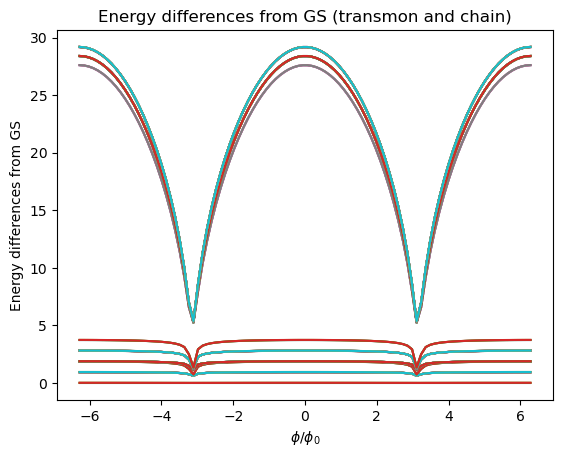

In [61]:
energies_transmon_and_chain = 100
for i in range(energies_transmon_and_chain):
    plt.plot(flux,np.real(eigenvalues_diff[:,i]))


plt.xlabel(r'${\phi}/{\phi_0}$')
plt.ylabel('Energy differences from GS')
plt.title('Energy differences from GS (transmon and chain)')

# Save the figure as an image (e.g., PNG)
filename = f'graph_of_energy_diff_from_GS_for_transmon+chain_{energies_transmon_and_chain}_energies_gamma_L={gamma_L}_gamma_R={gamma_R}_t={t}.png'
plt.savefig(filename)

# plt.legend()
plt.show()



Transmon + chain + cavity: Now let's add the cavity

In [9]:
max_num_photons = 3
omega_c = 1
g = 1

# harmonic osc creation and annihilation
occupation = np.arange(1,max_num_photons+1, dtype=complex)
a_down = np.diag(np.sqrt(occupation), k=1)
a_up = np.diag(np.sqrt(occupation), k=-1)
occupation_operator = a_up @ a_down

def H_cavity(omega_c = omega_c):
    H = omega_c*(a_up @ a_down)
    B = np.sum(np.abs(H-np.conj(H.T)))
    print("hermitian of H_cav:", B)
    return H

def H_int_transmon_cavity(g = g, n_0 = n_0, n_g = n_g, N = N): # also added the chain's dimension
    D = np.zeros(2*n_0+1) #this will be the diagonal
    for i in range(2*n_0+1):
        D[i] = (-n_0+i-n_g)
    H = g*np.kron(np.diag(D),np.kron(np.identity(2**N),(a_down+a_up)))
    B = np.sum(np.abs(H-np.conj(H.T)))
    print("hermitian of H_int_trans_cav:", B)
    return H

def H_3(flux):
    H = np.kron(H_total2(flux=flux), np.identity(max_num_photons+1)) + np.kron(np.identity((2*n_0+1)), np.kron(np.identity(2**N), H_cavity())) + H_int_transmon_cavity()
    B = np.sum(np.abs(H-np.conj(H.T)))
    print("hermitian of H_3:", B)
    return H

tic = time.time()

# test to verify my matrix
# H = H_3(flux[2])
# A = np.sum(np.abs(H - np.conj(H.T)))
# print(A)



eigenvalues_diff2 = np.zeros((steps,(2*n_0+1)*(2**N)*(max_num_photons+1)), dtype=complex) # we have num of rows in the size of steps and columns in the size of (2*n_0+1)*(2**N). each row contains all the eigenvalues for specific flux, so each column is a specific eigenvalue for diff fluxes.
eigenvectors_diff2 = np.zeros((steps,(2*n_0+1)*(2**N)*(max_num_photons+1),(2*n_0+1)*(2**N)*(max_num_photons+1)), dtype=complex)# first dim is steps of flux, 2nd and 3rd dims are for the eigenvectors. so if numpy returns the eigenvectors as a matrix where each column corresponds to eigen-energy, dim 2 is the rows of the matrix and dim 3 is the columns.

for i in range(steps):
    H = H_3(flux = flux[i])
    current_eigenvalues, current_eigenvectors = np.linalg.eig(H)
    print(i)
    # sort eigenvalues and rearrange corresponding eigenvectors
    sorted_indices = np.argsort(current_eigenvalues)
    sorted_eigenvalues = current_eigenvalues[sorted_indices]
    sorted_eigenvectors = current_eigenvectors[:, sorted_indices]
    # store results
    eigenvalues_diff2[i,:] = sorted_eigenvalues-sorted_eigenvalues[0] # the difference from the GS
    eigenvectors_diff2[i,:,:] = sorted_eigenvectors

toc = time.time()
print(f"time {toc - tic}s")


0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
0
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
1
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
2
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
3
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
4
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
5
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
6
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
7
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
8
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
9
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
hermitian of H_3: 0.0
10
0.0
hermitian of H_cav: 0.0
hermitian of H_int_trans_

Plot of the differences from the GS

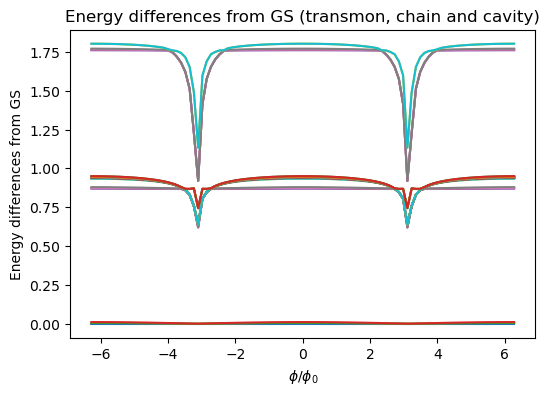

[[[ 5.74589555e-03-4.39749526e-26j  1.91809237e-16-2.68456287e-20j
    5.63079243e-16-6.38538507e-19j ...  1.42790699e-14-8.01804558e-19j
   -2.68001604e-02-1.25523547e-26j -2.67461861e-02-4.82675392e-26j]
  [ 9.73734302e-04-2.94439868e-27j -3.73259485e-16-5.01504596e-21j
    3.03004561e-16+1.77757668e-18j ... -2.79067487e-14+1.92044576e-18j
    7.46444766e-02+3.46440099e-26j  7.49039771e-02+1.34840389e-25j]
  [ 3.85823053e-04-9.48386453e-27j -3.87494301e-16+3.10236996e-21j
   -2.93157550e-16-2.77402430e-18j ...  3.01039553e-14-2.70355011e-18j
   -1.16710105e-01-5.46716106e-26j -1.16408250e-01-2.10191199e-25j]
  ...
  [ 9.73734302e-04+2.56715060e-27j -3.46299601e-16-1.97480189e-21j
   -7.86406969e-17-8.67112504e-19j ...  3.03409064e-14+4.08548747e-17j
    7.46444766e-02+1.32273041e-25j -7.49039772e-02+9.11213232e-27j]
  [-3.85823053e-04+3.93741432e-27j -4.00178654e-16+2.03786472e-21j
   -5.31252740e-16-1.37552450e-18j ...  5.27615156e-14+6.35055645e-17j
    1.16710105e-01+2.06194830e-2

In [62]:
fig = plt.figure(figsize=(6, 4))
energies = 30
for i in range(energies):
    plt.plot(flux,np.real(eigenvalues_diff2[:,i]))

plt.xlabel(r'${\phi}/{\phi_0}$')
plt.ylabel('Energy differences from GS')
plt.title('Energy differences from GS (transmon, chain and cavity)')
plt.autoscale()
# Save the figure as an image (e.g., PNG)
filename = f'graph_of_energy_diff_from_GS_for_transmon+chain+cavity_{energies}_energies_gamma_L={gamma_L}_gamma_R={gamma_R}_t={t}.png'
plt.savefig(filename)

# plt.legend()
plt.show()
print(eigenvectors_diff2)

Now I want to plot the difference between any two energies as a function of the flux E_i-E_j when E_i > E_j. also I want to add a color bar and paint the lines in the graph by the transition probability between the levels i and j that is caused from the transmon-cavity coupling meaning the term (a_down+a_up).
I will first create the transition prob matrix - M.

In [50]:
steps = 100
amount_of_energies = 30
delta_energy = np.zeros((steps,1)) # contains the energy differences, here i will stack the energies
M = np.zeros_like(delta_energy, dtype=complex) # contains the transition probability due to a_down + a_up, here i will stack the probabilities
operator = np.kron(np.identity((2*n_0+1)*(2**N)),(a_down+a_up)) # that's the operator I want to get the transition probability for
print(operator.shape) # sanity test

for i in range(amount_of_energies-1, -1, -1): # a loop that iterates from 19 to 0 including
    for j in range(i-1, -1, -1): # a loop that iterates from i-1 to 0 including
        diff = eigenvalues_diff2[:,i] - eigenvalues_diff2[:,j] # should be an array with number of rows as "steps" and one column
        temp = np.hstack((delta_energy, diff.reshape(-1,1))) # here i stack the diff in the delta_energy matrix and reshape the diff column to (-1,1) meaning I want it to be 1 column and the number of rows i leave for numpy to figure out according to the data
        delta_energy = temp
        temp_expectation_vec = np.zeros((steps,1), dtype=complex) # here I want to save the transition probability from j to i for each step because each step have different eigenvectors
        for step in range(steps):
            vec_i = eigenvectors_diff2[step,:,i]
            vec_j = eigenvectors_diff2[step,:,j]
            M_ij = vec_i.conjugate().dot(operator.dot(vec_j))
            temp_expectation_vec[step,0] = M_ij
        temp_M = np.hstack((M, temp_expectation_vec.reshape(-1,1)))
        M = temp_M

print(M.shape)
print(delta_energy.shape)
M = M[:, 1:]
M = np.abs(M)
M = np.log10(M)
delta_energy = delta_energy[:, 1:]
delta_energy = np.abs(delta_energy)


(2816, 2816)
(100, 436)
(100, 436)


Now I will plot the data with colormap

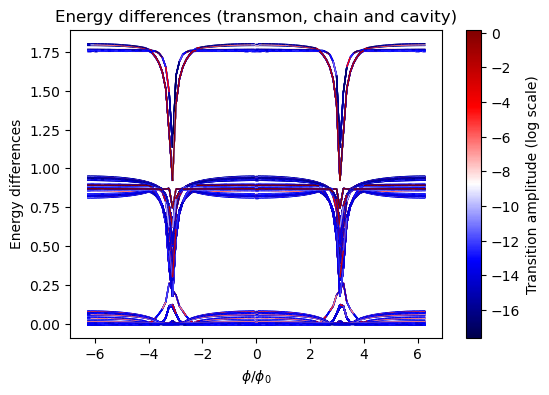

In [63]:
from matplotlib import colors
from matplotlib.cm import get_cmap
from matplotlib.collections import LineCollection


norm = colors.Normalize(vmin=np.min(M),vmax=np.max(M)) # normalizes the M values to 0-1
cmap = get_cmap('seismic')
fig, ax = plt.subplots(figsize=(6, 4)) # creates a figure and axes objects. figure contains all the elements of a plot - subplots,titles,labels, legends. axes is an individual plotting area within the fig, this is the plot itself. fig contains the axes (subplots)

for i in range(0, delta_energy.shape[1]):
    points = np.array([flux, delta_energy[:,i]]).T.reshape(-1, 1, 2) # shaping the x,y points to a (200,1,2) dim so each entry contains a point x,y
    segments = np.concatenate([points[:-1], points[1:]], axis=1) # points[:-1] removes the last point, points[1:] removes the first point. it only slices along the first dim.
    lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=1) # this object contains the line segments and properties needed to create the lines
    lc.set_array(M[:,i]) # used to specify an array of values that will be used to determine the color of each segment in the LineCollection
    ax.add_collection(lc) # add the linecollection to the ax
    if i == 0:
        # Adding colorbar to show the color scale
        cb = plt.colorbar(lc, ax=ax)
        cb.set_label('Transition amplitude (log scale)')

ax.autoscale() #adjusts the axis limits to fit the data in the subplot
# colorbar = plt.colorbar()
# colorbar.set_label('Custom Value')
plt.xlabel(r'${\phi}/{\phi_0}$')
plt.ylabel('Energy differences')
plt.title('Energy differences (transmon, chain and cavity)')

# Include parameter values in the legend without lines
# legend_parameter_values = [f'gamma_L: {gamma_L}', f'gamma_R: {gamma_R}', f'tunneling in the chain: {t}']
# handles = [plt.Line2D([], [], linestyle='None', label=value) for value in legend_parameter_values]
# ax.legend(handles=handles)

# Save the figure as an image (e.g., PNG)
filename = f'graph_of_energy_diff_for_transmon+chain+cavity_{amount_of_energies}_energies_gamma_L={gamma_L}_gamma_R={gamma_R}_t={t}.png'
plt.savefig(filename)

plt.show()